In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


In [ ]:

data = pd.read_csv("../data/german_credit_data.csv", index_col=0)
print(data.shape)
data.head()



(1000, 10)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [68]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [69]:
data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [70]:
data["Checking account"].value_counts(normalize=True)

Checking account
little      0.452145
moderate    0.443894
rich        0.103960
Name: proportion, dtype: float64

In [71]:
data["Saving accounts"].value_counts(normalize=True)

Saving accounts
little        0.738066
moderate      0.126071
quite rich    0.077111
rich          0.058752
Name: proportion, dtype: float64

In [72]:
data["Checking account"].fillna(data["Checking account"].mode()[0],inplace=True)
data["Saving accounts"].fillna(data["Saving accounts"].mode()[0],inplace=True)

In [73]:
data.isna().sum()


Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [74]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [75]:
var_num = data.select_dtypes(include="number").columns.tolist()
enumerate(var_num,1)


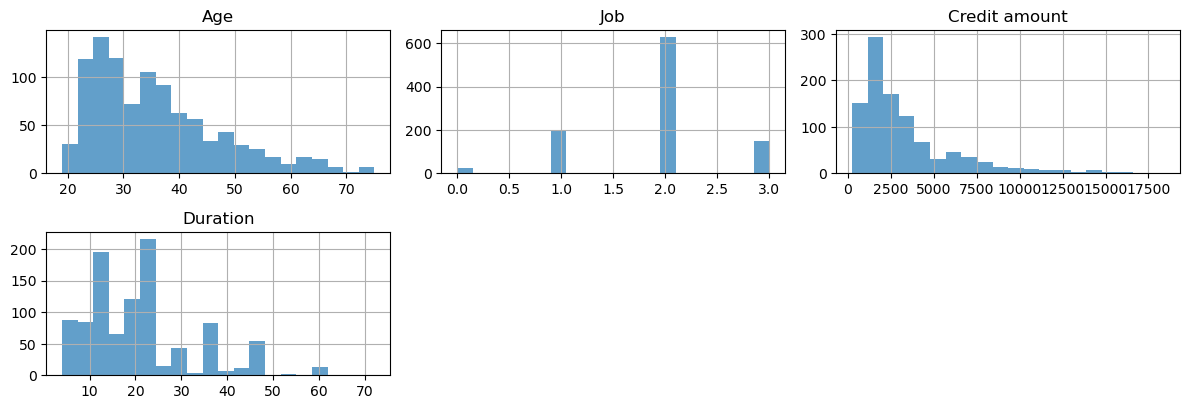

In [76]:

plt.figure(figsize=(12, 8))

for i, col in enumerate(var_num, 1):
    plt.subplot(4, 3, i) 
    data[col].hist(bins=20, alpha=0.7)
 
    plt.title(col) 

plt.tight_layout()  
plt.show()  


Nettoyage

In [77]:
data["Checking account"].unique()

array(['little', 'moderate', 'rich'], dtype=object)

In [78]:
encoder = LabelEncoder()
data["Housing"] = encoder.fit_transform(data["Housing"])
data["Saving accounts"] = encoder.fit_transform(data["Saving accounts"])
data["Checking account"] = encoder.fit_transform(data["Checking account"])
data["Purpose"] = encoder.fit_transform(data["Purpose"])
data["Sex"] = encoder.fit_transform(data["Sex"])



In [79]:
data.replace(["bad","good"],[0,1],inplace=True)
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,0,804,12,5,1
998,23,1,2,0,0,0,1845,45,5,0


Text(0.5, 1.0, 'Sexe')

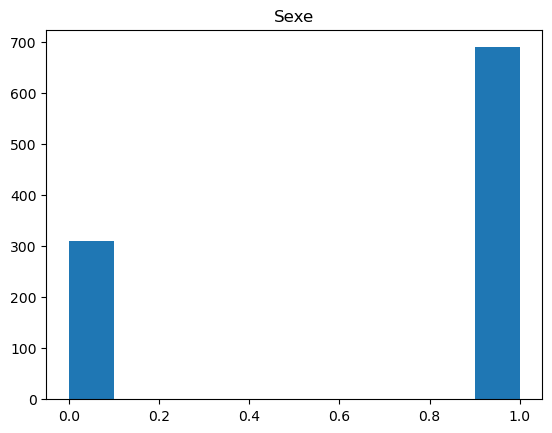

In [80]:
plt.hist(data["Sex"])
plt.title("Sexe")

Text(0.5, 1.0, 'Age')

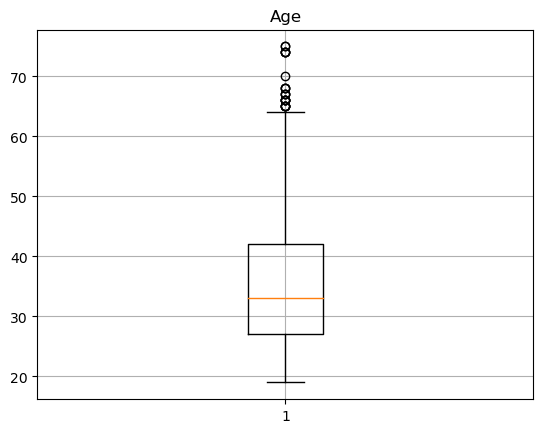

In [81]:
plt.boxplot(data["Age"])
plt.grid()
plt.title("Age")

{'whiskers': [<matplotlib.lines.Line2D at 0x116c1863fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x116c18697d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x116c1863310>],
 'medians': [<matplotlib.lines.Line2D at 0x116c186ad90>],
 'fliers': [<matplotlib.lines.Line2D at 0x116c186b810>],
 'means': []}

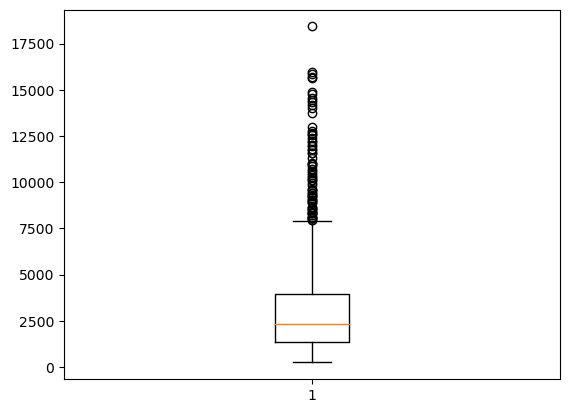

In [82]:
plt.boxplot(data["Credit amount"])

Text(0.5, 1.0, 'Duration')

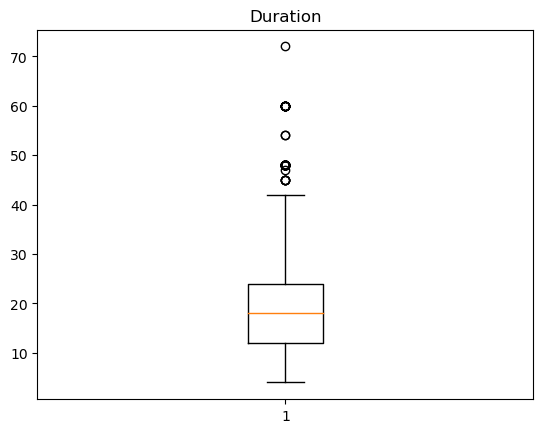

In [83]:
plt.boxplot(data["Duration"])
plt.title("Duration")

Gestion des outliers

In [84]:
# Création d'une fonction

def finding_outliers(data,variable_name):
    iqr  = data[variable_name].quantile(0.75)-data[variable_name].quantile(0.25)
    l_born = data[variable_name].quantile(0.75)-1.5*iqr
    s_born = data[variable_name].quantile(0.75)+1.5*iqr
    return data[(data[variable_name]<l_born) | (data[variable_name]>s_born)]

def gerer_outliers(df, variable_name):
    iqr = df[variable_name].quantile(0.75)-df[variable_name].quantile(0.25)
    df.loc[finding_outliers(df,variable_name).index,variable_name] = df[variable_name].quantile(0.75)+1.5*iqr


Text(0.5, 1.0, 'Boxplot : credit amount')

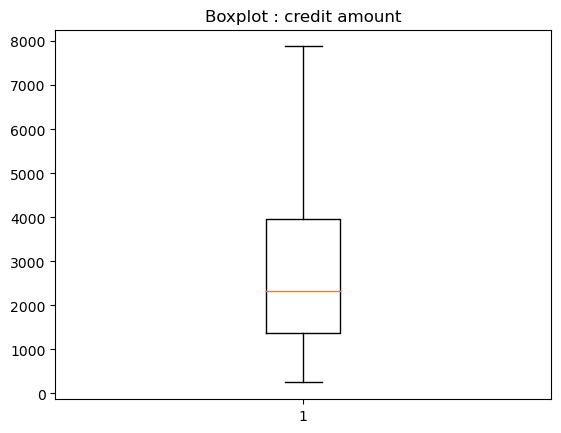

In [85]:
gerer_outliers(data, 'Credit amount')
gerer_outliers(data,'Age')
gerer_outliers(data,'Duration')
plt.boxplot(data["Credit amount"])
plt.title("Boxplot : credit amount")


Text(0.5, 1.0, 'Boxplot : Age')

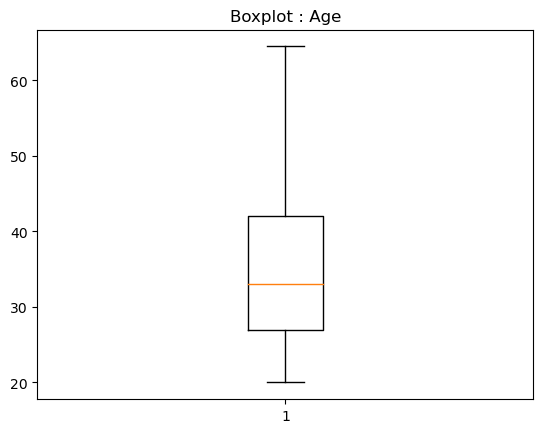

In [86]:
plt.boxplot(data["Age"])
plt.title("Boxplot : Age")

Text(0.5, 1.0, 'Boxplot : Duration')

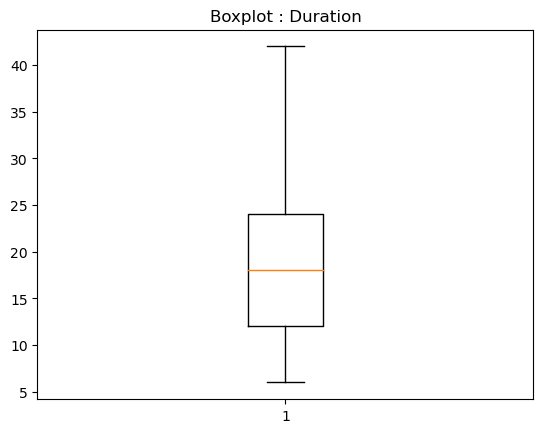

In [87]:
plt.boxplot(data["Duration"])
plt.title("Boxplot : Duration")

<Axes: >

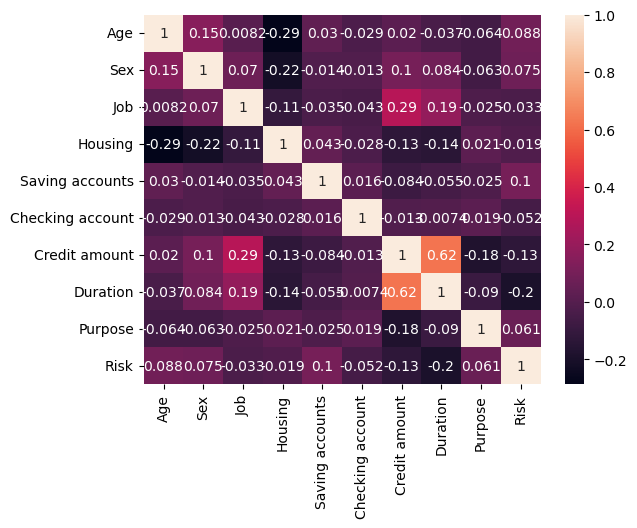

In [ ]:
sns.heatmap(data.corr(),annot=False)

Séparation de variable


In [90]:
y = data["Risk"]
X = data.drop("Risk",axis=1)

X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,64.5,1,2,1,0,0,1169.0,6,5
1,22.0,0,2,1,0,1,5951.0,42,5
2,49.0,1,1,1,0,0,2096.0,12,3
3,45.0,1,2,0,0,0,7882.0,42,4
4,53.0,1,2,0,0,0,4870.0,24,1
...,...,...,...,...,...,...,...,...,...
995,31.0,0,1,1,0,0,1736.0,12,4
996,40.0,1,3,1,0,0,3857.0,30,1
997,38.0,1,2,1,0,0,804.0,12,5
998,23.0,1,2,0,0,0,1845.0,42,5


Encodage

In [91]:
y.replace(['good','bad'],[1,0],inplace=True)
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int64

In [92]:
label_encoders = LabelEncoder()

for col in X.columns.tolist():
    X[col] = label_encoders.fit_transform(X[col])

In [93]:
X


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,45,1,2,1,0,0,142,0,5
1,2,0,2,1,0,1,770,24,5
2,29,1,1,1,0,0,390,6,3
3,25,1,2,0,0,0,848,24,4
4,33,1,2,0,0,0,734,15,1
...,...,...,...,...,...,...,...,...,...
995,11,0,1,1,0,0,310,6,4
996,20,1,3,1,0,0,661,19,1
997,18,1,2,1,0,0,69,6,5
998,3,1,2,0,0,0,332,24,5


### Construction du modele

In [94]:
from sklearn.ensemble import AdaBoostRegressor,BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,accuracy_score,roc_auc_score,roc_curve

In [95]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)
print(f"x_train :{x_train.shape} ")
print(f"x_test :{x_test.shape} ")
print(f"y_train :{y_train.shape} ")
print(f"y_test :{y_test.shape} ")

x_train :(800, 9) 
x_test :(200, 9) 
y_train :(800,) 
y_test :(200,) 


In [96]:
param_grid = {'n_neighbors':np.arange(1,150),
              'metric' : ['euclidean','manhattan','minkowski']
              }
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)


{'metric': 'manhattan', 'n_neighbors': 58}


In [ ]:
KN_model = grid.best_estimator_
#joblib.dump(KN_model,'knn_model.pkl')
KN_model.fit(x_train,y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=58)

In [98]:
KN_model.score(x_test,y_test)

0.7

Performance du modèle

In [99]:

y_predict_train_KN= KN_model.predict(x_train)
y_predict_test_KN= KN_model.predict(x_test)

train_accuracy = accuracy_score(y_train,y_predict_train_KN)
test_accuracy  = accuracy_score(y_test,y_predict_test_KN)

train_auc = roc_auc_score(y_train,y_predict_train_KN)
test_auc = roc_auc_score(y_test,y_predict_test_KN)

train_recall = recall_score(y_train,y_predict_train_KN)
test_recall = recall_score(y_test,y_predict_test_KN)

accuracies = pd.DataFrame({
    'Métriques' : ['Accurary_score','roc_auc_score','recall_score'],
    'Données entrainement': [train_accuracy,train_auc,train_recall],
    'Données test' : [test_accuracy,test_auc,test_recall]
})
accuracies

,Métriques,Données entrainement,Données test
0,Accurary_score,0.697500,0.700000
1,roc_auc_score,0.508929,0.504762
2,recall_score,0.980357,0.992857


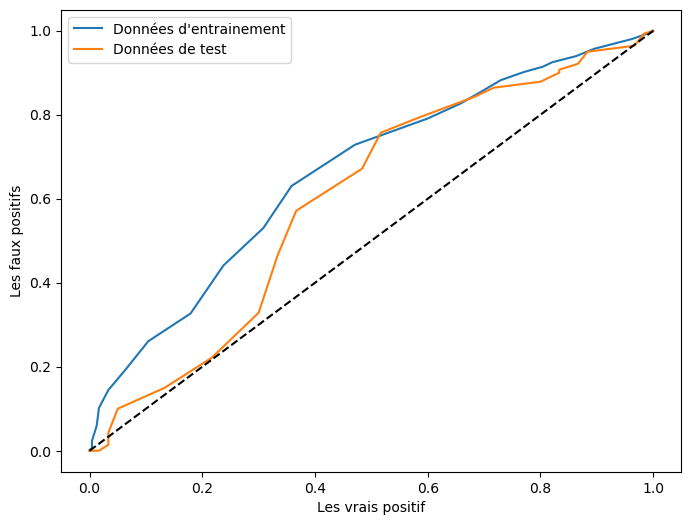

In [100]:
# Obtenir les scores de probabilités pour les classes positves

y_train_proba = KN_model.predict_proba(x_train)[:,1]
y_test_proba = KN_model.predict_proba(x_test)[:,1]

# Calcul des faux positifs (FPR) et de vrais positifs(TPR)
train_fpr,train_tpr,_ = roc_curve(y_train,y_train_proba)
test_fpr,test_tpr,_ = roc_curve(y_test,y_test_proba)

# Tracé des courbes

plt.figure(figsize=(8,6))
plt.plot(train_fpr,train_tpr,label="Données d'entrainement")
plt.plot(test_fpr,test_tpr,label="Données de test")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("Les vrais positif")
plt.ylabel("Les faux positifs")
plt.legend()

## RandomClassifier

In [ ]:
param_grid = {'n_estimators':np.arange(1,150)}
grid = GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

In [ ]:
RFC_model = grid.best_estimator_
#joblib.dump(RFC_model,'random_classifier.pkl')

['random_classifier.pkl']

In [ ]:
RFC_model.score(x_train,y_train)

1.0

In [ ]:
RFC_model.score(x_test,y_test)

0.73

In [ ]:

y_predict_train_rfc= RFC_model.predict(x_train)
y_predict_test_rfc= RFC_model.predict(x_test)

train_accuracy = accuracy_score(y_train,y_predict_train_rfc)
test_accuracy  = accuracy_score(y_test,y_predict_test_rfc)

train_auc = roc_auc_score(y_train,y_predict_train_rfc)
test_auc = roc_auc_score(y_test,y_predict_test_rfc)

train_recall = recall_score(y_train,y_predict_train_rfc)
test_recall = recall_score(y_test,y_predict_test_rfc)

accuracies = pd.DataFrame({
    'Métriques' : ['Accurary_score','roc_auc_score','recall_score'],
    'Données entrainement': [train_accuracy,train_auc,train_recall],
    'Données test' : [test_accuracy,test_auc,test_recall]
})
accuracies

,Métriques,Données entrainement,Données test
0,Accurary_score,1.0,0.730000
1,roc_auc_score,1.0,0.617172
2,recall_score,1.0,0.906475


Un grand écart entre le score d'entrainement et de test

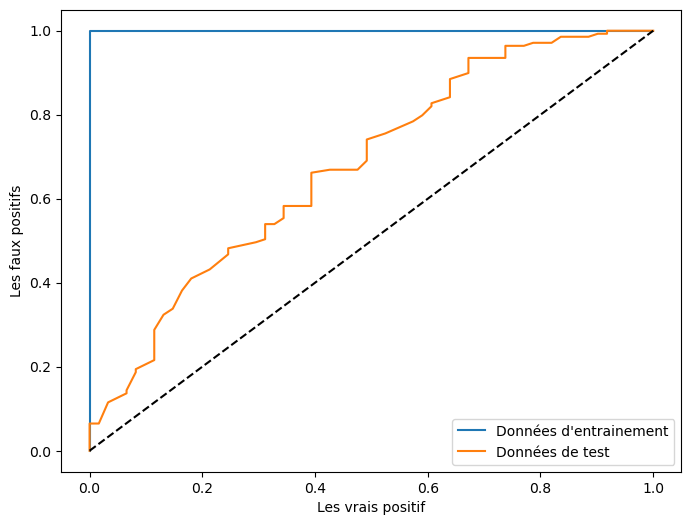

In [ ]:
# Obtenir les scores de probabilités pour les classes positves

y_train_proba = RFC_model.predict_proba(x_train)[:,1]
y_test_proba = RFC_model.predict_proba(x_test)[:,1]

# Calcul des faux positifs (FPR) et de vrais positifs(TPR)
train_fpr,train_tpr,_ = roc_curve(y_train,y_train_proba)
test_fpr,test_tpr,_ = roc_curve(y_test,y_test_proba)

# Tracé des courbes

plt.figure(figsize=(8,6))
plt.plot(train_fpr,train_tpr,label="Données d'entrainement")
plt.plot(test_fpr,test_tpr,label="Données de test")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("Les vrais positif")
plt.ylabel("Les faux positifs")
plt.legend()

Entrainé un réseau de neurone de classification

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Définir le modèle MLP (réseau de neurone)
mpl = MLPClassifier(hidden_layer_sizes=(10,10),# 2 couches cachées de 10 neurones chacune
                    activation='logistic',         # La fonction d'activation
                    solver='adam',             # L'optimiseur
                    max_iter=10000,
                    random_state=42
                    ) 


In [ ]:
mpl.fit(x_train,y_train)
mpl.score(x_train,y_train)

0.70125

In [ ]:
y_pred = mpl.predict(x_test)

accc = accuracy_score(y_test,y_pred)
accc

0.695

## BAGGING


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
base_model = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(base_estimator=base_model, # modele de base
                                  n_estimators=25, #Nombre de modele
                                  max_features=1, #Nombre de caractérique utilisé pour chaque modele
                                  max_samples=0.9, #Proportion des échantillons à utiliser
                                  random_state=42,
                                  n_jobs=-1 # Utiliser tous les coeurs disponibles
                                  )

In [ ]:
bagging_model.fit(x_train,y_train)
bagging_model.score(x_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.70375

## BOOSTING 
### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adaboost_model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1), #Souche arbre
    n_estimators=10, # nombre de modeles faibles
    learning_rate=1.0, #Taux d'apprentissage
    random_state=42
)

In [ ]:
adaboost_model.fit(x_train,y_train)

y_pred = adaboost_model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Précision d'Adaboost : {accuracy}")

Précision d'Adaboost : 0.71


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=1,
    max_depth=3
)

In [ ]:
gb_model.fit(x_train,y_train)

y_pred = gb_model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Précision de Gradiant boost : {accuracy}")

Précision de Gradiant boost : 0.625


In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Charger les données
file_path = 'german_credit_data.csv'
df = pd.read_csv(file_path)

# Aperçu des données
print("Aperçu des données :")
print(df.head())
print("\nInformations sur les colonnes :")
print(df.info())

# Encodage des colonnes catégoriques (si nécessaire)
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Vérification des valeurs manquantes
if df.isnull().sum().sum() > 0:
    print("Valeurs manquantes détectées, remplissage par la moyenne pour les colonnes numériques.")
    df.fillna(df.mean(numeric_only=True), inplace=True)

# Séparation des caractéristiques (X) et de la variable cible (y)
X = df.drop(columns=['Risk'])  # Remplacez 'risk' par le nom exact de la colonne cible
y = df['Risk']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise à l'échelle des caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Création et entraînement du modèle (RandomForestClassifier ici, mais vous pouvez essayer d'autres modèles)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédiction et évaluation du modèle
y_pred = model.predict(X_test)

# Affichage des résultats
print("\nÉvaluation du modèle :")
print("Exactitude (Accuracy) :", accuracy_score(y_test, y_pred))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))

Aperçu des données :
   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  

Informations sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
-